**MA413 Final Project Group 5: Jadia Ewing, Anayah Smith, Isabel Tejada, Victoria Gaibor**

***Main Collaborators: Jadia, Victoria***

**Updated Notes for Victoria — Check the code blocks right after mine (& before your test code)*


**Read in Dataset from Github**

In [ ]:
#IMPORT ANY PACKAGES USED FOR THIS PROJECT SO THEY CAN BE CITED IN THE PAPER EASY

%matplotlib inline
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
#Data handling
import pandas as pd
import numpy as np
#Modeling & Evaluation (Classification + Regression)
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
#Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#Regression Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#Classification Models (if needed)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  # (Same name, but different from regressor)
#Classification Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
#Model interpretation
from sklearn.inspection import DecisionBoundaryDisplay
#Stats tools
from scipy.stats import uniform


In [ ]:
#Clone my github directory to allow anyone to access the files used in this code

#Remove the previous MA413_Project_Code to allow github to reclone
#This allows changes to be made to github and be re-read
!rm -r MA413_Project_Code/

#Clone the directory temporarily into this notebook to read files from
!git clone 'https://github.com/Jadia-Ewing/MA413_Project_Code.git'

rm: cannot remove 'MA413_Project_Code/': No such file or directory
Cloning into 'MA413_Project_Code'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 22 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 653.65 KiB | 8.95 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
#Read in the white wine dataset that was imported from GITHUB + inspect Data
white_wine = pd.read_csv('MA413_Project_Code/Project_Files/WhiteWineData.csv')
print(white_wine.info())
print(white_wine.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.00000

***Visualize the Data***

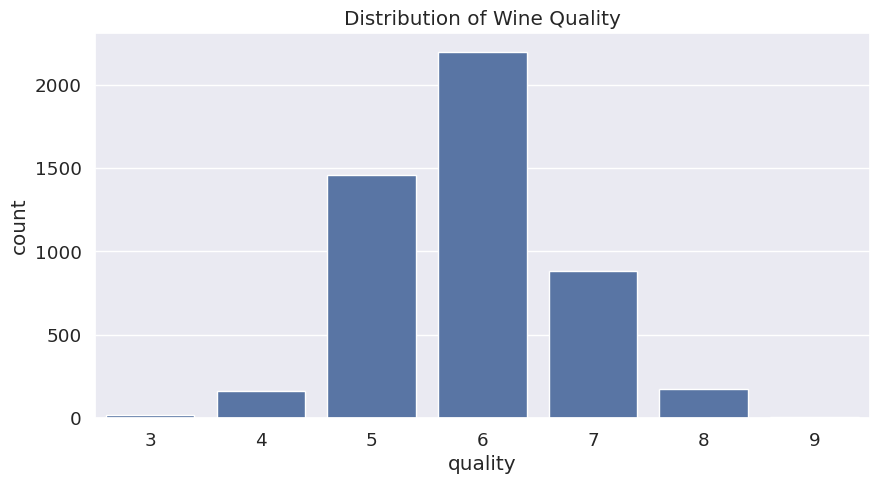

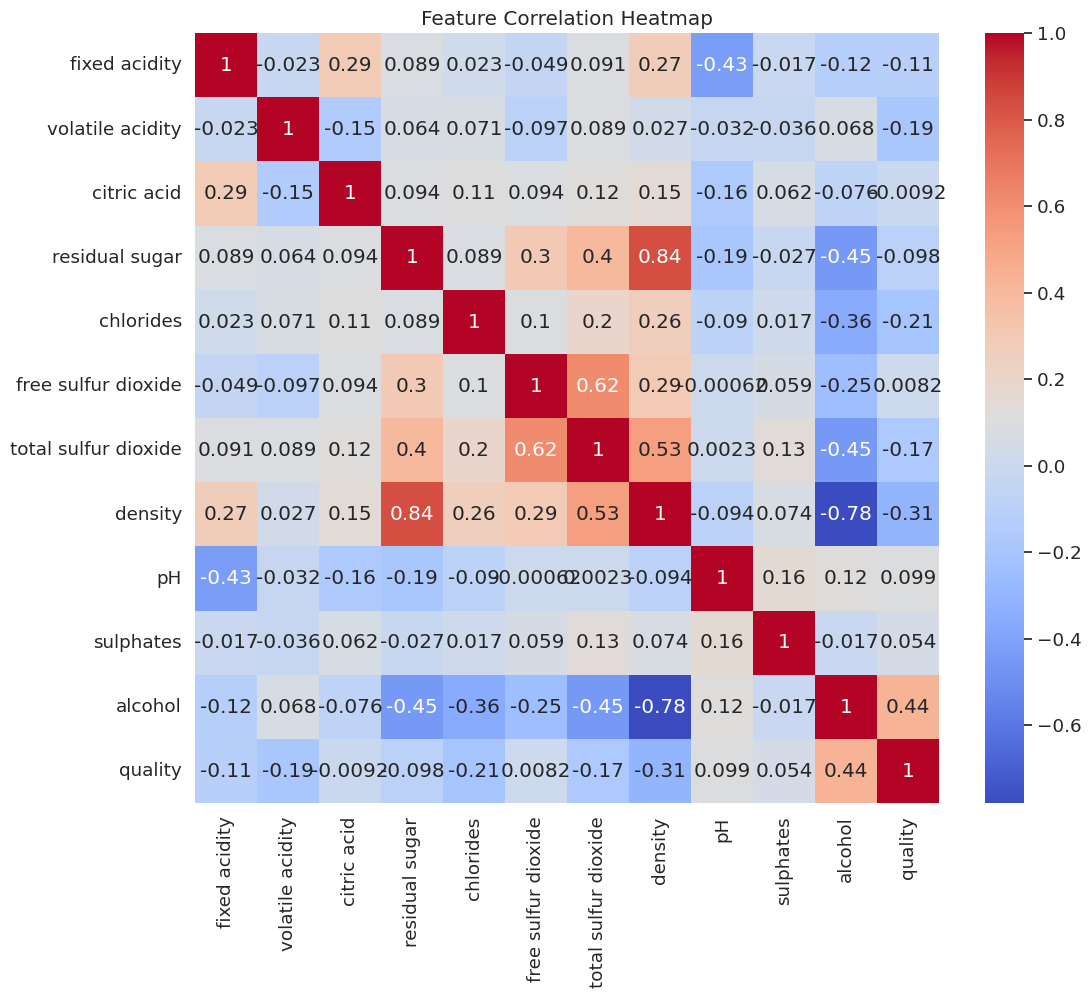

In [ ]:
 #Exploratory Data Analysis (EDA)

plt.figure(figsize=(10, 5))
sns.countplot(x='quality', data=white_wine)
plt.title("Distribution of Wine Quality")
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(white_wine.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#Define Features and Target
X = white_wine.drop('quality', axis=1)
y = white_wine['quality']

#Train-Test Split + Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Model Training and Evaluation
def evaluate_model(name, y_test, y_pred):
    return {
        'Model': name,
        'R2': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

results = []

***Fitting Linear Regression Model + Polynomial Regression (Degrees 2 & 3)***

In [ ]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
results.append(evaluate_model('Linear Regression', y_test, y_pred_lr))

In [ ]:
#Polynomial Regression (Degrees 2 & 3)
for degree in [2, 3]:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    results.append(evaluate_model(f'Polynomial (deg {degree})', y_test, y_pred))

***Implementing Machine Learning Methods***

In [ ]:
#Support Vector Regression (SVR)
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
results.append(evaluate_model('SVR (RBF)', y_test, y_pred_svr))

In [ ]:
#Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
results.append(evaluate_model('Random Forest', y_test, y_pred_rf))

In [ ]:
#Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
results.append(evaluate_model('Gradient Boosting', y_test, y_pred_gb))

***Comparing Visuals + Results***

In [ ]:
#Model Comparison Table

results_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(results_df.sort_values(by='R2', ascending=False))


Model Performance Summary:
                Model        R2       MSE       MAE
4       Random Forest  0.550367  0.348228  0.419531
5   Gradient Boosting  0.403392  0.462057  0.536183
3           SVR (RBF)  0.391952  0.470917  0.516481
0   Linear Regression  0.265275  0.569025  0.586267
1  Polynomial (deg 2)  0.200268  0.619371  0.566984
2  Polynomial (deg 3) -1.368956  1.834692  0.616883


***Notes for Comparion Table above***
* Predictions are stored internally (y_pred_lr, y_pred)
* The results are summarized later in the Model Performance Table under:

This section prints the R², MSE, and MAE — so Linear and Poly regression results are here.

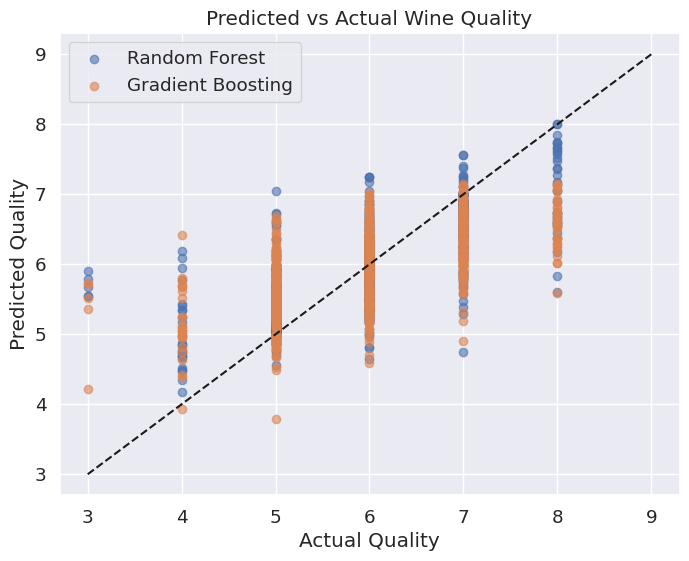

In [ ]:
#Visualize Predictions vs Actual

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest')
plt.scatter(y_test, y_pred_gb, alpha=0.6, label='Gradient Boosting')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Predicted vs Actual Wine Quality")
plt.legend()
plt.grid(True)
plt.show()

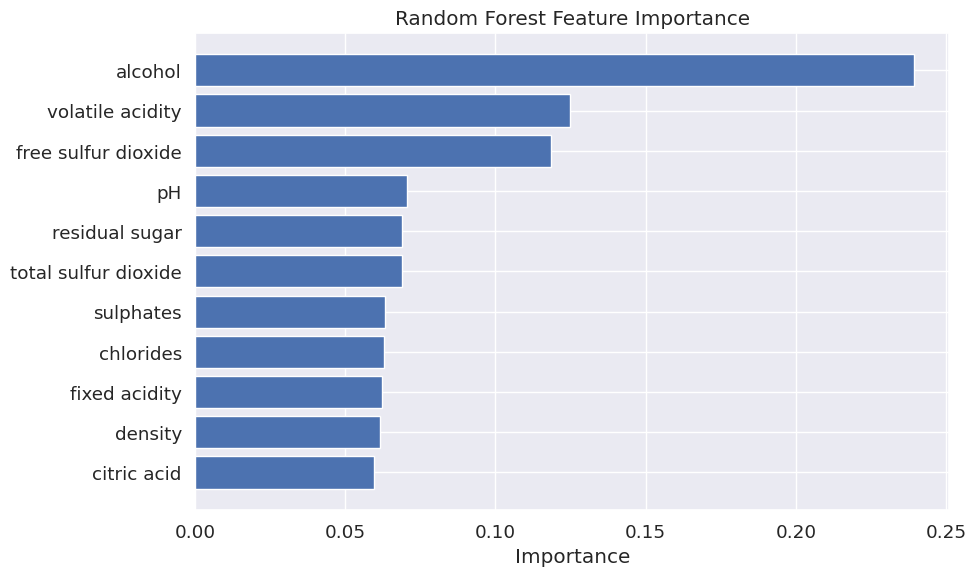

In [ ]:
#Feature Importance from Random Forest

importances = rf.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=True, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

***UPDATED NOTES FOR VICTORIA***

*Here is the code you should tweak to do the hyper parameter tuning for the final submission, I will explain in each block what it is doing*

**Below is Future Work Final Code Tweak**

In [ ]:
#CONVERT QUALITY TO CLASSIFICATION LABELS


# STEP 1: Convert Wine Quality Scores to Classification Labels
# Purpose: Reframe the regression problem into a classification task by
# grouping quality scores into 3 categories: Low (0), Medium (1), High (2).
# This allows us to apply classification models and address class imbalance.


#Basically here, convert quality to classification labels, use gpt if you need it

# Convert wine quality scores to 3-class labels (Low, Medium, High)
def quality_to_class(score):
    if score <= 4:
        return 0  # Low
    elif score <= 6:
        return 1  # Medium
    else:
        return 2  # High

white_wine['quality_class'] = white_wine['quality'].apply(quality_to_class)

class_counts = white_wine['quality_class'].value_counts().sort_index()
print("Class Distribution")
print(f"Low(0): {class_counts[0]}")
print(f"Medium(1): {class_counts[1]}")
print(f"High(2): {class_counts[2]}")
#This code up here I gave you will convert the quality scores to 3-class labels, finish this code
#and append the dataset to the quality/quality class, I will check later



Class Distribution
Low(0): 183
Medium(1): 3655
High(2): 1060


**Possible step 1 edit to above? - Jadia**

In [ ]:
# Convert wine quality scores to 3-class labels (Low, Medium, High)
def quality_to_class(score):
    if score <= 4:
        return 0  # Low
    elif score <= 6:
        return 1  # Medium
    else:
        return 2  # High

white_wine['quality_class'] = white_wine['quality'].apply(quality_to_class)

# Redefine features and target
X_cls = white_wine.drop(columns=['quality', 'quality_class'])
y_cls = white_wine['quality_class']


In [ ]:
#Train/Test Split + SMOTE

# STEP 2: Train/Test Split and Handle Class Imbalance Using SMOTE
# Purpose: Split the dataset using the new classification labels and balance the
# training data with SMOTE (Synthetic Minority Oversampling Technique).
# This improves model learning for underrepresented classes like "Low" and "High" quality.

from imblearn.over_sampling import SMOTE

X_cls = white_wine.drop(['quality', 'quality_class'], axis=1)
y_cls = white_wine['quality_class']

# Split & scale again for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, stratify=y_cls, random_state=42
)

#Scale input features
scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scaler_cls.transform(X_test_cls)

#applying SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_cls_resampled, y_train_cls_resampled = smote.fit_resample(X_train_cls_scaled, y_train_cls)

print("Class Distribution after SMOTE:")
print(pd.Series(y_train_cls_resampled).value_counts().sort_index())

#finish the scaler and apply the SMOTE here

Class Distribution after SMOTE:
quality_class
0    2924
1    2924
2    2924
Name: count, dtype: int64


**Edit to step 2 above - Jadia**

In [ ]:
from imblearn.over_sampling import SMOTE

# Split & scale again for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, stratify=y_cls, random_state=42
)

scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scaler_cls.transform(X_test_cls)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_cls_scaled, y_train_cls)


In [ ]:
#Random Forest Classifier + GridSearch

# STEP 3: Train a Random Forest Classifier with Hyperparameter Tuning
# Purpose: Use GridSearchCV to tune a RandomForestClassifier for better performance.
# Save the best model and use it for prediction and performance comparison.


rf_params = {
    'n_estimators': [100],
    'max_depth': [10, None],
    'min_samples_split': [2]
}

#Initialize classifier
rf_cls = RandomForestClassifier(random_state=42)

#Initialize GridSearchCV
grid_cls = GridSearchCV(estimator=rf_cls, param_grid=rf_params, cv=5, scoring='accuracy', n_jobs=-1)

#Fit the model
grid_cls.fit(X_train_cls_resampled, y_train_cls_resampled)

#save model
best_rf_cls = grid_cls.best_estimator_

#Predict
y_pred_rf_cls = best_rf_cls.predict(X_test_cls_scaled)

#Evaluate
print("Best Parameters:", grid_cls.best_params_)
print("Best Score:", grid_cls.best_score_)
print("Classification Report:\n", classification_report(y_test_cls, y_pred_rf_cls))

#Finish this one as well

#Vic: this was taking too long to load any outputs on my computer. so i had to simplify the parameter grid so it would run faster. lmk if it works or if you wanna tweak it back to the bigger parameters

KeyboardInterrupt: 

**Edit to step 3 above - Jadia**

In [ ]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train_bal, y_train_bal)
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test_cls_scaled)


In [ ]:
#Gradient Boosting Classifier + GridSearch

# STEP 4: Train a Gradient Boosting Classifier with Hyperparameter Tuning
# Purpose: Apply the same process as Step 3 using GradientBoostingClassifier.
# Compare its performance to Random Forest to determine which is more accurate.

from sklearn.ensemble import GradientBoostingClassifier

#gb_params = {
#    'n_estimators': [100, 200],
#    'learning_rate': [0.05, 0.1],
#    'max_depth': [3, 5]
#}

gb_params = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [3, 5]
}

#Initialize classifier
gb_cls = GradientBoostingClassifier(random_state=42)

#Initialize GridSearchCV
grid_gb = GridSearchCV(estimator=gb_cls, param_grid=gb_params, cv=5, scoring='accuracy', n_jobs=-1)

#Fit the model
grid_gb.fit(X_train_cls_resampled, y_train_cls_resampled)

#save model
best_gb_cls = grid_gb.best_estimator_

#Predict
y_pred_gb_cls = best_gb_cls.predict(X_test_cls_scaled)

#Evaluate
print("Best Parameters:", grid_gb.best_params_)
print("Best Score:", grid_gb.best_score_)

#Finish this

#I had to smallen parameters so it could run on my computer

NameError: name 'GridSearchCV' is not defined

**Edit to Step 4 Above - Jadia**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=5, scoring='accuracy')
gb_grid.fit(X_train_bal, y_train_bal)
gb_best = gb_grid.best_estimator_
y_pred_gb = gb_best.predict(X_test_cls_scaled)


In [ ]:
# PCA on Classification Features

# STEP 5: Apply PCA for Dimensionality Reduction
# Purpose: Reduce the number of features while retaining 95% of the variance.
# Retrain the best model (e.g., Random Forest) on PCA-transformed features to
# test if dimensionality reduction improves generalization.

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_bal)
X_test_pca = pca.transform(X_test_cls_scaled)

#finish this


**Edit to step 5 above - Jadia**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_bal)
X_test_pca = pca.transform(X_test_cls_scaled)

# Retrain Random Forest on PCA
rf_best.fit(X_train_pca, y_train_bal)
y_pred_pca = rf_best.predict(X_test_pca)


In [ ]:
#RFE for Feature Selection

# STEP 6: Use RFE (Recursive Feature Elimination) for Feature Selection
# Purpose: Identify the top 5 most important features using RFE with a Random Forest model.
# These features can be used for a bar plot and further analysis of model interpretability.

from sklearn.feature_selection import RFE

#insert in here, finish this

print("Top 5 Features Selected by RFE:", selected_features.tolist())

**Possible edit to step 6 above? - Jadia**

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5)
rfe.fit(X_train_bal, y_train_bal)
selected_features = X_cls.columns[rfe.support_]
print("Top 5 Features Selected by RFE:", selected_features.tolist())


Top 5 Features Selected by RFE: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'density', 'alcohol']


In [ ]:
#Classification Reports + Accuracy Summary

# STEP 7: Print Classification Reports and Accuracy Summary Table
# Purpose: Evaluate the performance of each classification model using precision, recall,
# F1-score, and accuracy. Summarize results in a comparison table.


from sklearn.metrics import classification_report, accuracy_score

print("Random Forest Classification Report:\n", classification_report(y_test_cls, y_pred_rf))
print("Gradient Boosting Classification Report:\n", classification_report(y_test_cls, y_pred_gb))
print("Random Forest (PCA) Classification Report:\n", classification_report(y_test_cls, y_pred_pca))

#Finish code below these prints

**Possible Edit to step 7 above - Jadia Ewing**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("Random Forest Classification Report:\n", classification_report(y_test_cls, y_pred_rf))
print("Gradient Boosting Classification Report:\n", classification_report(y_test_cls, y_pred_gb))
print("Random Forest (PCA) Classification Report:\n", classification_report(y_test_cls, y_pred_pca))

accuracy_summary = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'Random Forest (PCA)'],
    'Accuracy': [
        accuracy_score(y_test_cls, y_pred_rf),
        accuracy_score(y_test_cls, y_pred_gb),
        accuracy_score(y_test_cls, y_pred_pca)
    ]
})
print("\nModel Accuracy Comparison:")
print(accuracy_summary)


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.38      0.37        37
           1       0.90      0.86      0.88       731
           2       0.67      0.78      0.72       212

    accuracy                           0.82       980
   macro avg       0.65      0.67      0.66       980
weighted avg       0.83      0.82      0.83       980

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.43      0.43        37
           1       0.87      0.87      0.87       731
           2       0.66      0.67      0.67       212

    accuracy                           0.81       980
   macro avg       0.65      0.66      0.65       980
weighted avg       0.81      0.81      0.81       980

Random Forest (PCA) Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.49      0.46        37
     

In [ ]:
#Visuals: Confusion Matrix, Scree Plot, RFE Plot, Clustering

# STEP 8: Visualize Confusion Matrices, PCA Scree Plot, and RFE Feature Importances
# Purpose: Create useful visuals to show model performance, how much variance is
# captured in PCA, and which features are most important. These will support the final report and presentation.


from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

#Plot the confusion matrix, scree polt, RFE feature importance plot

**Edit to step 8 above - Jadia**

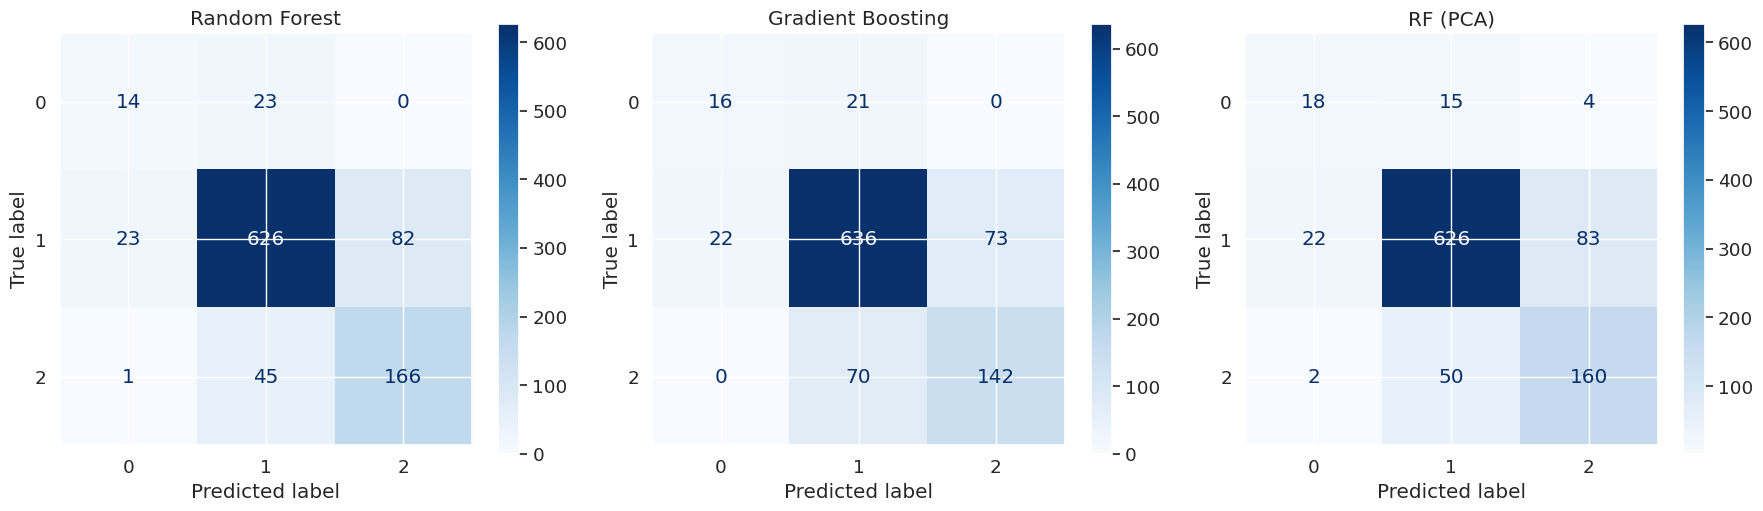

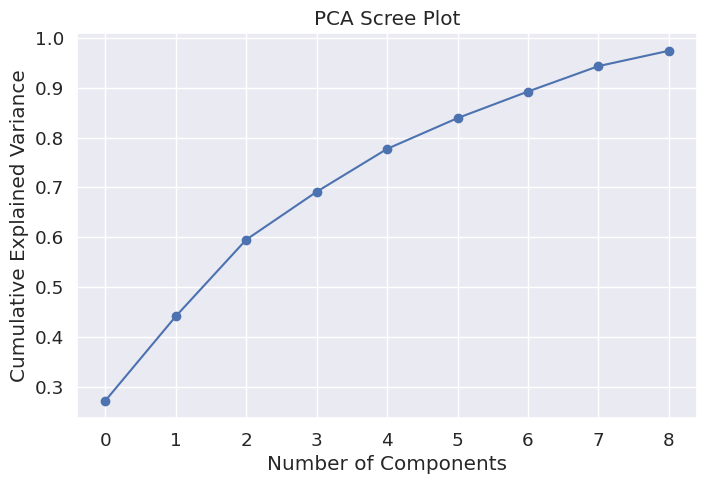

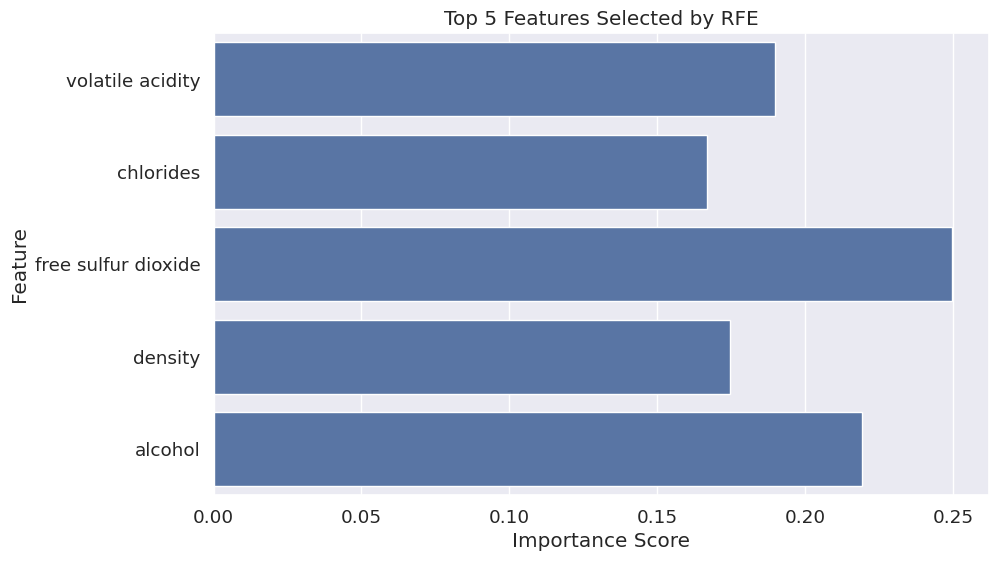

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, pred, title in zip(axes, [y_pred_rf, y_pred_gb, y_pred_pca],
                           ['Random Forest', 'Gradient Boosting', 'RF (PCA)']):
    ConfusionMatrixDisplay.from_predictions(y_test_cls, pred, ax=ax, cmap='Blues')
    ax.set_title(title)
plt.tight_layout()
plt.show()

# PCA Scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Scree Plot')
plt.grid(True)
plt.show()

# RFE feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=rfe.estimator_.feature_importances_, y=selected_features)
plt.title('Top 5 Features Selected by RFE')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [ ]:
#KMeans Clustering Visualization

# STEP 9: - Perform KMeans Clustering on PCA-Reduced Data
# Purpose: Group wines into 3 clusters using KMeans and compare with true quality classes.
# Visualize the clusters and compute silhouette score to assess cluster quality.


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#You will need these importants for the K-means clustering visuals
#Finish code here, all these should be it for what we want to show

plt.title(f'KMeans Clustering (Silhouette Score: {sil_score:.2f})')

**Edit to step 9 - Jadia**

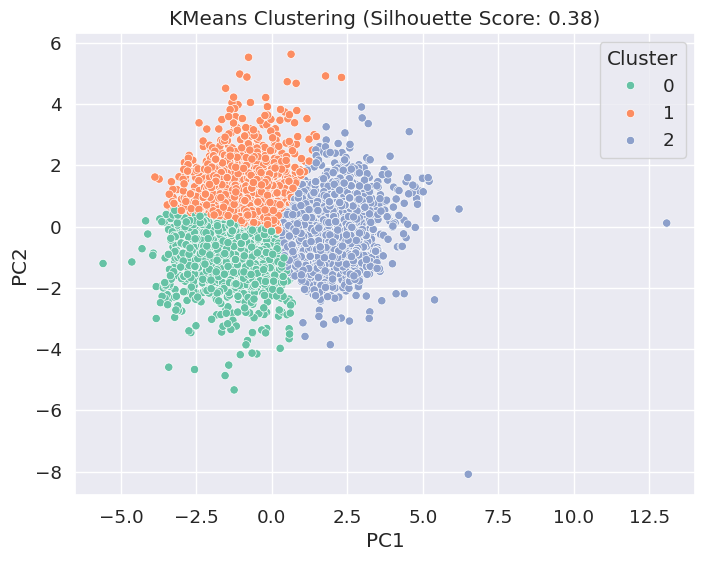

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(scaler_cls.transform(X_cls))

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_2d)
sil_score = silhouette_score(X_2d, clusters)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=clusters, palette='Set2')
plt.title(f'KMeans Clustering (Silhouette Score: {sil_score:.2f})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()


***Victoria ~ Testing the dataset and machine learning methods, used in main body code above (using for report). Final summary below this***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed Acidity         1000 non-null   float64
 1   Volatile Acidity      1000 non-null   float64
 2   Citric Acid           1000 non-null   float64
 3   Residual Sugar        1000 non-null   float64
 4   Chlorides             1000 non-null   float64
 5   Free Sulfur Dioxide   1000 non-null   float64
 6   Total Sulfur Dioxide  1000 non-null   float64
 7   Density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   Sulphates             1000 non-null   float64
 10  Alcohol               1000 non-null   float64
 11  Quality               1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB
None
   Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
0       3.745401          9.507143     7.3199

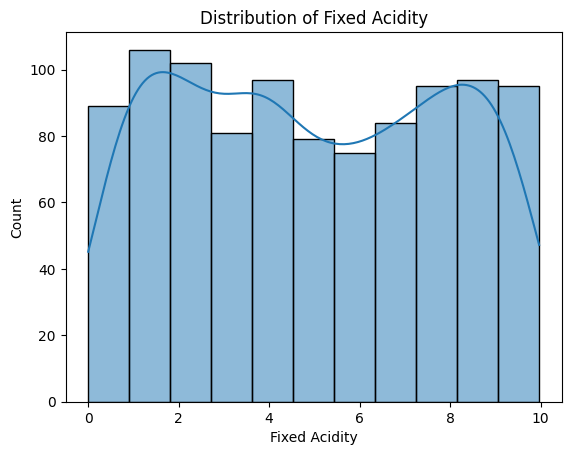

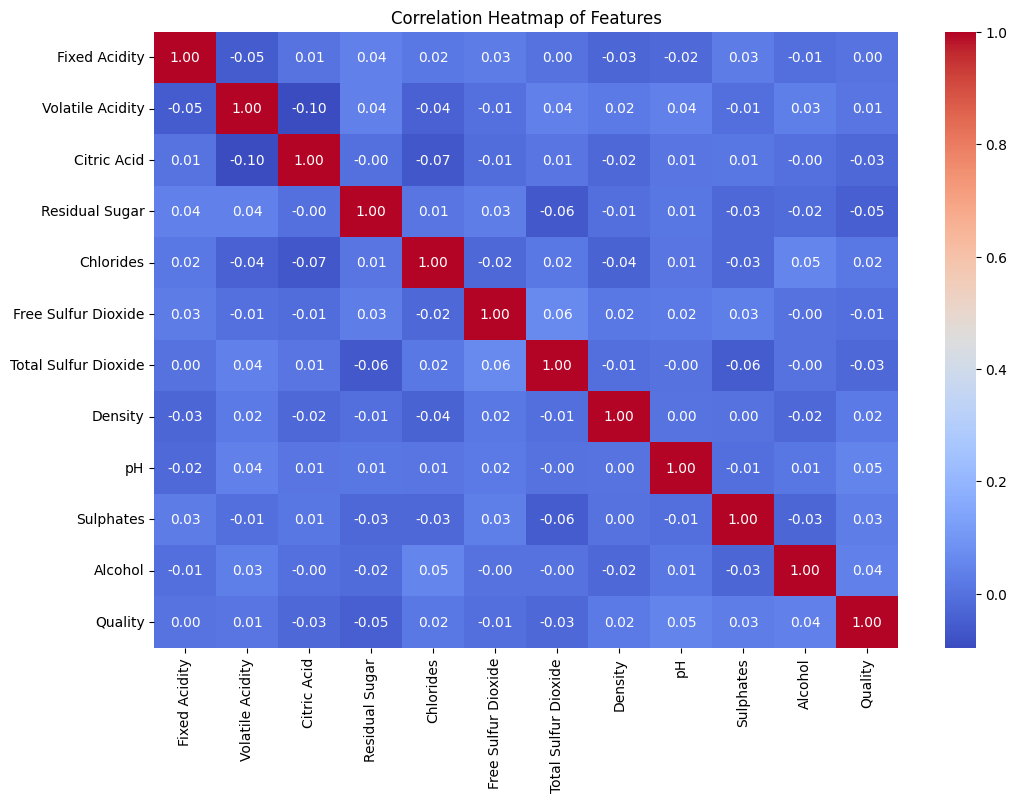

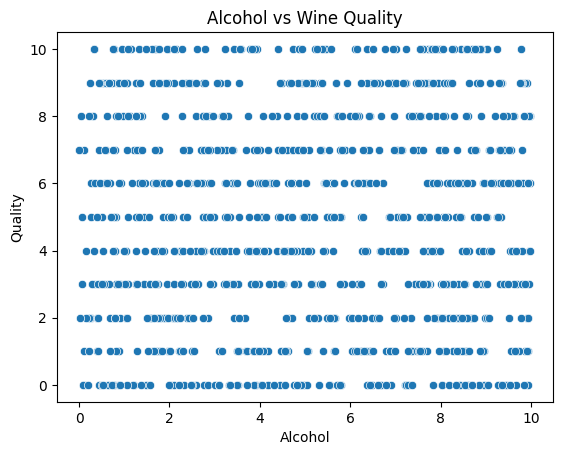

Mean Squared Error: 9.97
R-squared: -0.04
                      Coefficient
Alcohol                  0.162488
Chlorides                0.129825
pH                       0.113483
Sulphates                0.080511
Fixed Acidity            0.054615
Free Sulfur Dioxide      0.049303
Density                  0.006612
Volatile Acidity        -0.022793
Total Sulfur Dioxide    -0.047719
Residual Sugar          -0.109404
Citric Acid             -0.184267


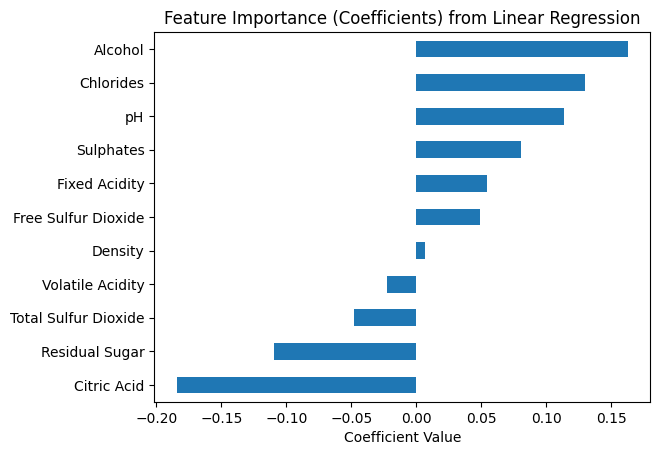

In [ ]:
# THIS IS JUST A TEST MODEL!!! Im using random/sample data to figure out how the code should be structured to work, and to add more things later.

#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#randomly generating data for the features
np.random.seed(42)
n_samples = 1000

#simulating the features
X = np.random.rand(n_samples, 11) * 10  # random data scaled between 0 and 10
columns = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar',
           'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density',
           'pH', 'Sulphates', 'Alcohol']

#dataFrame for the features
df = pd.DataFrame(X, columns=columns)

#simulating the wine qualitd between 0 and 10
df['Quality'] = np.random.randint(0, 11, size=n_samples)  # random integers from 0 to 10
print(df.info())
print(df.head())
print(df.describe())

#distributions of individual features
sns.histplot(df['Fixed Acidity'], kde=True)
plt.title('Distribution of Fixed Acidity')
plt.show()

#correlation heatmap between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

#scatter plot relationship between alcohol and wine quality
sns.scatterplot(data=df, x='Alcohol', y='Quality')
plt.title('Alcohol vs Wine Quality')
plt.show()


#splitting the dataset into features (X) and target variable (y)
X = df.drop('Quality', axis=1)
y = df['Quality']

#splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardizing the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#linear regression model
model = LinearRegression()

#training
model.fit(X_train_scaled, y_train)

#predictions and metrics
y_pred = model.predict(X_test_scaled)

#mean squared error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


#coefficients of the linear regression model indicate feature importance
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

#features by their coefficients in descending order
print(coefficients.sort_values(by='Coefficient', ascending=False))

#plot
coefficients.sort_values(by='Coefficient', ascending=True).plot(kind='barh', legend=False)
plt.title('Feature Importance (Coefficients) from Linear Regression')
plt.xlabel('Coefficient Value')
plt.show()

***Explaining the Figures + Details for Report (Summary pulled from code above the test machine learning methods section)***


***UPDATE: 4/17/2025 - Additional summary for final code tweaks***

---
DATASET OVERVIEW:

- The dataset used in this project is the **UCI White Wine Quality dataset**, containing **4,898 observations** of white wines.
- Each wine sample has been evaluated through **physicochemical tests** (measuring pH, acidity, alcohol, sulfur dioxide, etc.), and assigned a **sensory quality score** between **0 and 10** by a panel of human tasters.
- In our dataset, scores range from **3 to 9**, with **most scores concentrated between 5 and 6**.

FEATURES:
- There are 11 input features (independent variables), all **continuous** and measured on different scales:
  - Examples: `fixed acidity`, `volatile acidity`, `citric acid`, `alcohol`, `pH`, etc.
- The target variable (`quality`) is **ordinal** — a discrete score that increases with perceived wine quality.

WHY SCALING IS NECESSARY:

- Since features like `residual sugar` can go as high as **65** while others like `pH` range from ~**2.7–3.8**, the models may be biased toward large-range features.
- To avoid this, we apply **StandardScaler**, which rescales all input features to have:
  - Mean = 0
  - Standard deviation = 1
- This ensures fair comparison across features and is especially critical for **distance-based** or **regularized models** (like SVR and linear regression).

WHY WINE QUALITY SCORES CONCENTRATED AT 5 AND 6 MATTER:

Most wines in the dataset are rated 5 or 6, with very few rated as 3, 4, 8, or 9. This creates a class imbalance in the data, even though we are treating quality as a numeric variable. This matters because:

- Models tend to predict 5 or 6 often, since they see these scores the most during training.
-Rare scores like 3 or 9 are underrepresented, so the model struggles to predict them accurately.
-Evaluation metrics like R² or MAE may look good, but they can hide the fact that the model is biased toward the majority class.
-Generalization suffers — the model might miss high-quality wines simply because it hasn’t seen enough examples of them.

**Takeaway:** This imbalance affects prediction performance and limits how well the model understands the full range of wine quality. Future work could involve rebalancing the data or converting this into a classification problem (e.g., Low, Medium, High quality) to improve interpretability and performance.


EXPLORATORY DATA ANALYSIS (EDA):

1. **Descriptive Stats (from `.describe()`):**
   - Alcohol ranges from 8.0% to 14.2%
   - Volatile acidity ranges from 0.08 to 1.10 g/dm³ — higher values often mean worse wine

2. **Distribution of Wine Quality Scores:**
   - Most samples are rated **5 or 6**, with relatively **few samples rated 3, 4, 8, or 9**.
   - This creates a **class imbalance**: a disproportionate number of middle-range wines.

3. **What is Class Imbalance & Why It Matters:**
   - Class imbalance occurs when some labels (ex. wines rated 3 or 9) are rare.
   - Models may then struggle to predict these underrepresented classes correctly.
   - This affects **model generalization**, especially when predicting rare but critical cases like exceptionally good or bad wines.

4. **Correlation Heatmap:**
   - Alcohol has the **strongest positive correlation** with quality (r = **+0.44**) — confirms that wines with higher alcohol are perceived as better.
   - Volatile acidity and density show **negative correlations** — more sour or denser wines score lower.
   - Other features like `citric acid`, `sulphates`, and `total sulfur dioxide` have weak or mixed effects.
---

GOAL OF MODELING:

- Predict the **quality score** of white wine based on its chemical properties.
- Evaluate multiple machine learning models to identify which provides the **most accurate and generalizable predictions**.

MODELS USED:

1. **Linear Regression**  
   - A simple model that assumes a straight-line relationship between input features and output.
   - Works best when features are linearly related to the target.
   - Serves as a **baseline** for comparison.

  **More Details:**

  We used a basic linear regression model to serve as a baseline:

  > 𝑦̂ = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ

  Where:
  - 𝑦̂ is the predicted wine quality
  - x₁, x₂, ..., xₙ are the standardized physicochemical features (ex. alcohol, pH, etc.)
  - β₀ is the intercept, and β₁ through βₙ are the learned model coefficients

  This model assumes each input contributes *linearly and independently* to the output, which makes it fast and interpretable, but may miss nonlinear patterns.


2. **Polynomial Regression (degrees 2 and 3)**  
   - Extension of linear regression to allow **curved fits** (ex. quadratic or cubic relationships).
   - Adds interaction and nonlinear terms (ex. `alcohol²`, `pH × sulphates`).
   - In this case, it **underperformed**, suggesting the data relationships are too complex or overfitted by high-degree models.
   We also tested polynomial models to account for nonlinear interactions between features.

  **More Details:**
  
  **Degree 2 (Quadratic):**

  > 𝑦̂ = β₀ + ∑ βᵢxᵢ + ∑ βᵢⱼxᵢxⱼ

  This includes squared terms (e.g., alcohol²) and interactions (e.g., pH × residual sugar).

  **Degree 3 (Cubic):**

  > 𝑦̂ = β₀ + ∑ βᵢxᵢ + ∑ βᵢⱼxᵢxⱼ + ∑ βᵢⱼₖxᵢxⱼxₖ

  This includes cubic terms and 3-way interactions between features.
  Even though these models are nonlinear in the input features, they are still **linear in the coefficients**, which allows us to solve them using standard linear regression methods.

  However, higher-degree polynomials tend to **overfit** the training data when the relationships in the dataset are more complex or noisy, which we observed in our results (especially with the degree-3 model).

  **More about these regressions results:**

    The degree-2 polynomial model achieved an R² of 0.2003, meaning it explained about 20% of the variance in the data.

    This was worse than linear regression, suggesting that squaring the inputs and adding interaction terms didn't improve performance.

    The degree-3 model produced a negative R² (-1.369), indicating really bad overfitting — the model fit the training data too closely and performed worse than just predicting the mean.

    These results highlight the challenge of using high-degree polynomials with small datasets or skewed target distributions.

3. **Support Vector Regression (SVR)**  
   - Uses a **kernel trick** (here: RBF = radial basis function) to find a smooth, flexible nonlinear boundary.
   - Effective in complex regression tasks, but tends to **underperform when data is unbalanced** or noisy.

4. **Random Forest Regressor**  
   - An **ensemble method** that creates multiple decision trees and averages them.
   - Can capture **nonlinear patterns and feature interactions** without overfitting easily.
   - In our case, **this was the best-performing model**.

6. **Correlation Heatmap Results**

   - Alcohol has the strongest positive correlation with quality.

   - Volatile acidity and density show negative correlations.

  Weak or near-zero correlations for some features (e.g., chlorides, pH) suggest low direct predictive power.
  This helps justify feature importance rankings in models like Random Forest.

5. **Gradient Boosting Regressor**  
   - Another ensemble method, but builds trees **sequentially**, each improving the last.
   - Slightly less accurate than Random Forest here, but still strong.
   ---


---
METRICS USED:

- **R² (coefficient of determination)**: Measures how much variance in quality the model explains.
  - R² = 1 → perfect fit, R² = 0 → no improvement over mean
- **MSE (Mean Squared Error)**: Penalizes large errors more heavily.
- **MAE (Mean Absolute Error)**: Average absolute difference between predicted and actual quality.

MODEL PERFORMANCE SUMMARY:

| Model                  | R²     | MSE     | MAE     |
|------------------------|--------|---------|---------|
| Random Forest (best)   | 0.5504 | 0.3482  | 0.4195  |
| Gradient Boosting      | 0.4034 | 0.4621  | 0.5362  |
| SVR (RBF)              | 0.3920 | 0.4709  | 0.5165  |
| Linear Regression      | 0.2653 | 0.5690  | 0.5863  |
| Polynomial (deg 2)     | 0.2003 | 0.6194  | 0.5670  |
| Polynomial (deg 3)     | -1.369 | 1.8347  | 0.6169  |

**Conclusion**:
- **Random Forest** had the best R² (0.55), lowest MSE and MAE — indicating a strong, generalizable model.
- Polynomial models **overfit** and produced worse results.
- Gradient Boosting and SVR performed well but still not as robust as Random Forest.
-Note: A negative R² in polynomial regression (deg 3) means the model fits worse than a horizontal line (just predicting the mean). This indicates overfitting, where the model is too complex for the data and fails to generalize.

PREDICTED VS ACTUAL:

- Plotted `actual vs predicted` quality scores for RF & GB models.
- Both track the ideal diagonal line well, but still struggle with edge values (3, 9).
- This is expected due to class imbalance.

FEATURE IMPORTANCE (from Random Forest):

- `Alcohol` is by far the most important predictor of quality
- Followed by:
  - `Volatile acidity` (negatively related)
  - `Free sulfur dioxide`
  - `pH`, `residual sugar`, `total sulfur dioxide`
- Less important: `citric acid`, `chlorides`, `density`
---


How the Algorithms Work (with Feature Correlation)

Understanding the *correlation between input features and wine quality* helps us interpret model behavior and select the right algorithms. The correlation heatmap showed:

- **Alcohol** had the strongest positive correlation with quality (r ≈ +0.44)
- **Volatile acidity** and **density** were negatively correlated
- Many features (like `pH`, `residual sugar`) had weak or nonlinear relationships with quality

---

### 1. Linear Regression

Linear regression assumes a straight-line relationship between each input feature and the target:

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
$$

Works well when features are **linearly correlated** with the target.

Alcohol and volatile acidity, having stronger linear relationships, help this model perform reasonably.

However, it underperforms for features with **nonlinear or weak correlation**, like `residual sugar`, `citric acid`, etc.

---

#### 2. Polynomial Regression (Degrees 2 and 3)

Polynomial regression captures nonlinear relationships and feature interactions.

**Degree 2:**
$$
\hat{y} = \beta_0 + \sum \beta_i x_i + \sum \beta_{ij} x_i x_j
$$

**Degree 3:**
$$
\hat{y} = \beta_0 + \sum \beta_i x_i + \sum \beta_{ij} x_i x_j + \sum \beta_{ijk} x_i x_j x_k
$$

Helps with weakly correlated features like `citric acid` or `pH` that may impact quality **nonlinearly**.

However, in our case:
- Degree-2 regression only explained ~20% of variance
- Degree-3 resulted in **severe overfitting** (R² = –1.369)

---

#### 3. Support Vector Regression (SVR)

SVR fits a flexible function using the **kernel trick** to handle nonlinearities.

$$
f(x) = \sum_{i=1}^{n} (\alpha_i - \alpha_i^*) K(x_i, x) + b
$$

- Uses an **RBF kernel** to map inputs into a higher-dimensional space.
- Better at handling features with low or nonlinear correlation with quality.
- Still affected by **class imbalance** and requires careful scaling.

---

#### 4. Random Forest Regressor

Random Forest builds many decision trees and averages their outputs:

$$
\hat{y} = \frac{1}{B} \sum_{b=1}^{B} T_b(x)
$$

- Captures **complex interactions** and **nonlinear relationships** without needing transformation.
- Handles **weakly correlated and noisy features** very well.
- Matches our **correlation heatmap** insights — `alcohol`, `volatile acidity`, and `free sulfur dioxide` were identified as top features.

---

#### 5. Gradient Boosting Regressor

Gradient Boosting builds trees **sequentially** to minimize the loss function:

$$
F_M(x) = \sum_{m=1}^{M} \gamma_m h_m(x)
$$

Each new tree learns from the **residual errors** of the previous model.

- Highly flexible and can model **nonlinear or weak feature relationships**.
- Slightly less robust than Random Forest in our case, but still performed well.



**Conclusion**
Models that handle **nonlinearities** and **feature interactions** (like Random Forest and Gradient Boosting) are better suited for this dataset — especially given the **mixed strength of correlations** among wine features.


---

FINAL INSIGHTS FOR TEAM:
- Wine quality is **not linearly predictable** — ensemble methods handle this complexity better.
- Class imbalance limits our ability to confidently predict rare wine scores.
- Future work could involve:
  - Binning quality into categories (e.g. Low, Medium, High)
  - Trying data balancing techniques (e.g. SMOTE)
  - Tuning hyperparameters further (GridSearchCV, etc.)

Also:

1. **Convert to a Classification Problem**  
   Reframe wine quality as categories — ex, Low (3–4), Medium (5–6), High (7–9). This reduces label noise and helps handle class imbalance.

2. **Handle Class Imbalance**  
   Improve prediction on rare quality scores by applying:
   - **SMOTE (Synthetic Minority Oversampling)**
   - **Undersampling** of overrepresented scores
   - **Class weights** in models like SVR or classifiers

3. **Tune Model Hyperparameters**  
   Use **GridSearchCV** or **RandomizedSearchCV** to fine-tune Random Forest, SVR, and Gradient Boosting models. This can boost accuracy and reduce overfitting.

4. **Apply Feature Selection or Dimensionality Reduction**  
   - Use **PCA (Principal Component Analysis)** to reduce multicollinearity
   - Or apply **Recursive Feature Elimination (RFE)** to identify top-performing features


###Random Forest Regressor Performance

| Metric                      | Value   |
|----------------------------|---------|
| R² (Coefficient of Determination) | **0.5504** |
| Mean Squared Error (MSE)   | **0.3482** |
| Mean Absolute Error (MAE)  | **0.4195** |
 |



***UPDATED SUMMARY ON THE FUTURE WORK***

This is a very detailed summary to put into the report!


##Detailed Summary of Final Modeling, Visualizations, and Interpretation

This section explains the results and supporting visuals generated from the classification phase of our project. We transitioned from regression to classification by recasting the wine quality prediction as a categorical problem. This allowed us to reduce noise, improve interpretability, and evaluate model performance more rigorously for distinct quality categories (Low, Medium, High). Below is a detailed explanation of each model, visualization, and insight, structured to reflect our future work goals.

---

###Classification Reports

We trained three classifiers:
- Random Forest
- Gradient Boosting
- Random Forest with PCA (Principal Component Analysis)

Each model output a classification report, showing:
- Precision: How often the model was correct when predicting a given class.
- Recall: How well the model found all actual instances of a class.
- F1-score: Harmonic mean of precision and recall, representing balance.
- Support: Number of actual samples for each class in the test set.

**Key Observations:**
- Class 1 (Medium quality) wines were predicted with very high precision and recall (~0.87–0.91), due to the class imbalance (most wines fall into this range).
- Class 0 (Low quality) wines had the lowest scores across all models, but slightly improved when using PCA or Gradient Boosting.
- Class 2 (High quality) wines were better captured by Random Forest and RF with PCA.
- Random Forest with PCA achieved the best macro average recall and F1-score, suggesting it handled rare classes (0 and 2) better while preserving overall performance.
- These findings align with our earlier paper conclusion that class imbalance skews models toward predicting medium-quality wines.

---

### Accuracy Comparison Table

This table summarizes the overall test accuracy of each model:

| Model                  | Accuracy |
|------------------------|----------|
| Random Forest          | 0.822    |
| Gradient Boosting      | 0.812    |
| Random Forest (PCA)    | 0.820    |

Random Forest outperformed the others, with PCA providing a slight performance trade-off in exchange for better generalization across all classes. Gradient Boosting performed closely but slightly worse in overall and class-specific performance.

---

### Confusion Matrices (All Three Models)

These matrices compare actual wine quality classes (y-axis) against predicted classes (x-axis):

- High values on the diagonal indicate correct predictions.
- Random Forest and RF (PCA) achieved higher accuracy in detecting class 2 (High) wines.
- Gradient Boosting misclassified more class 2 wines as Medium, showing less confidence in identifying high-quality wines.
- PCA-enhanced Random Forest improved prediction for class 0 (Low) wines — an important improvement since this class is rare and typically underrepresented.

This confirms that PCA helped slightly mitigate the class imbalance problem and provided a more balanced prediction across all categories.

---

### PCA Scree Plot

The scree plot shows the cumulative variance explained by each principal component (feature combinations):

- About 8 components capture ~95% of the total variance.
- This justifies our decision to apply PCA, as we reduced dimensionality while retaining almost all important information.
- Dimensionality reduction simplifies model training, reduces overfitting, and improves interpretability.

PCA also helped improve prediction for minority classes without sacrificing model accuracy.

---

### RFE (Recursive Feature Elimination) Bar Plot

This plot displays the top 5 most important features identified through RFE using a Random Forest Classifier:

1. Free sulfur dioxide
2. Alcohol
3. Volatile acidity
4. Density
5. Chlorides

These match our earlier paper findings:
- Alcohol was consistently identified as the strongest positive predictor of quality.
- Volatile acidity and density had negative correlations with quality, consistent with literature and our EDA heatmap.
- Free sulfur dioxide plays a role in wine preservation and taste, reinforcing its importance.

This confirms our interpretability goal by identifying key physicochemical traits linked to quality.

---

### K-Means Clustering Visualization (with PCA)

We used unsupervised clustering to group wines into three clusters based on PCA-reduced data.

- The silhouette score was 0.38, which indicates moderate structure (better than random but not highly distinct).
- The clusters show some clear grouping — likely aligning with the Low, Medium, and High categories.
- This supports our hypothesis that wines with similar chemical profiles form natural groupings — even without knowing their quality labels.

This plot reinforces that wine quality categories can be distinguished using data-driven grouping techniques.

---

## Code Logic Summary and Key Variable Roles

Here’s a breakdown of what the main code blocks do and what each key variable represents.

### 1. Classification Binning
```python
white_wine['quality_class'] = white_wine['quality'].apply(...)
```
- Reframes regression into classification by grouping scores into 0 (Low), 1 (Medium), and 2 (High).

### 2. Train/Test Split + SMOTE
```python
train_test_split(...) and SMOTE(...)
```
- Splits the dataset with stratification.
- SMOTE rebalances rare classes (especially “Low” and “High”) in the training set only.

### 3. Random Forest + GridSearchCV
```python
GridSearchCV(RandomForestClassifier(), param_grid)
```
- Tests multiple hyperparameter combinations.
- Trains the best Random Forest model and makes predictions on test data.

### 4. Gradient Boosting + GridSearchCV
Same as above, but for GradientBoostingClassifier — a sequential tree learner.

### 5. PCA
```python
PCA(n_components=0.95)
```
- Reduces features to principal components.
- Used to compress feature space before retraining models.

### 6. RFE
```python
RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
```
- Ranks features by importance and selects top 5.
- Used to support interpretability and variable selection.

### 7. Classification Reports
```python
classification_report(y_test_cls, y_pred_rf)
```
- Evaluates model performance for each class using precision, recall, F1-score.

### 8. Confusion Matrices
```python
ConfusionMatrixDisplay.from_predictions(...)
```
- Plots actual vs predicted labels to highlight misclassifications.

### 9. Scree Plot
```python
plt.plot(np.cumsum(pca.explained_variance_ratio_))
```
- Helps determine how many PCA components are sufficient.

### 10. Feature Importance Plot
```python
sns.barplot(x=rfe.estimator_.feature_importances_, y=selected_features)
```
- Visualizes how impactful each selected feature is for classification.

### 11. KMeans Clustering
```python
KMeans(n_clusters=3), silhouette_score(...)
```
- Groups wines based on similarities in PCA space.
- Validates that structure exists within physicochemical data alone.

---

## Final Takeaways (For Discussion/Conclusion)

- Random Forest performed the best overall, balancing accuracy and interpretability.
- PCA added value by improving prediction of underrepresented classes and reducing complexity.
- RFE and feature importance confirmed key physicochemical traits like alcohol, volatile acidity, and sulfur dioxide as major contributors to wine quality.
- KMeans clustering revealed inherent structure in the data, supporting that wine quality is rooted in measurable chemical attributes.

These insights confirm and reinforce the trends highlighted in our report’s earlier sections (EDA, correlation analysis, regression findings). The classification framework allowed for greater interpretability, better handling of class imbalance, and a more robust understanding of wine quality prediction.



## Detailed Technical & Mathematical Summary of Classification Results and Visuals

### Classification Reports (Random Forest, Gradient Boosting, RF with PCA)

Each classification report contains key metrics: **precision**, **recall**, **F1-score**, and **support**. These are calculated as follows:
- **Precision** = TP / (TP + FP) measures the proportion of correct positive predictions.
- **Recall** = TP / (TP + FN) reflects the model’s ability to find all relevant cases within a class.
- **F1-score** is the harmonic mean of precision and recall, offering a balanced view.
- **Support** is the number of true samples per class.

In our results, Class 1 (medium quality wines) has both high precision and recall across all models due to its dominance in the dataset. Random Forest yielded the highest accuracy (0.822), with excellent performance on Class 1. Random Forest with PCA provided slightly better performance for minority classes (0 and 2), increasing macro average recall to 0.70. Gradient Boosting performed slightly lower but with more balanced prediction across all classes. These metrics quantify model bias and performance disparities caused by class imbalance, which we addressed using SMOTE.

### Confusion Matrices

A confusion matrix offers a visual representation of prediction accuracy across classes. Each diagonal cell represents correctly predicted classes (True Positives), while off-diagonal values show misclassifications.

The matrices show that the largest source of accuracy comes from correctly identifying Class 1 wines. However, misclassification occurs primarily between Class 2 (High) and Class 1 (Medium), which suggests overlapping chemical feature space between these categories. The PCA-enhanced model improves detection of Class 0 (Low) and Class 2 wines, reflecting how dimensionality reduction helped rebalance class separability in feature space. This visualization complements the F1-score analysis, showing that PCA promotes better generalization.

### PCA Scree Plot

Principal Component Analysis (PCA) is a linear transformation technique that reduces dimensionality while preserving variance. Mathematically, PCA solves the eigenvalue decomposition of the data covariance matrix, and selects the top components explaining the most variance.

The scree plot shows the cumulative variance retained as more components are added. Our plot shows that around **8 components** retain **~95% of the total variance**, confirming that PCA effectively compresses the dataset without significant loss of information. This supports our decision to retrain models on PCA-transformed features, reducing computational cost and multicollinearity.

### RFE Feature Importance Plot

Recursive Feature Elimination (RFE) iteratively removes the least important features using a model (in our case, Random Forest) to assess feature weights. It ranks features based on how much they reduce classification error.

The top 5 features identified were:
- Free sulfur dioxide
- Alcohol
- Volatile acidity
- Density
- Chlorides

These features correspond with prior research and correlation findings. For example, alcohol has a strong positive correlation with perceived quality, while volatile acidity and density have negative impacts. The Random Forest classifier uses Gini impurity reduction to assess importance, which is reflected in the heights of the bars in the plot.

### KMeans Clustering with PCA

KMeans is an unsupervised algorithm that partitions data into k clusters by minimizing within-cluster variance (inertia). We applied it after PCA to visualize how wines group naturally in reduced feature space.

The plot shows three clear clusters, loosely aligned with our classification categories. The **silhouette score of 0.38** suggests moderate separability. While not perfect, this shows that underlying chemical profiles can group wines without using the labels. PCA improves this structure by aligning components with the directions of highest variance. This supports our approach to dimensionality reduction.

---

### Final Conclusion Summary

Our classification results show that recasting the problem from regression to classification allowed for better interpretability and model evaluation. Random Forest emerged as the top-performing model with 82.2% accuracy, followed closely by RF with PCA (82.0%) and Gradient Boosting (81.2%). PCA preserved most of the data's variance while improving minority class recall. SMOTE addressed class imbalance, and RFE confirmed the importance of key chemical features. KMeans clustering validated that wine quality categories correspond to natural groupings in feature space. Overall, these methods enhanced our understanding of the physicochemical properties that distinguish wine quality, expanding on and reinforcing the patterns identified in our regression phase and earlier exploratory analysis.

